## Get the data


In [3]:
# import libraries for downloading data
import os
import tarfile
from six.moves import urllib

In [4]:
DOWNLOAD_ROOT  =  "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "dataset/housing/housing.tgz"

In [5]:
# function to fetch data
def fetch_housing_data(housing_url = HOUSING_URL, housing_path =  HOUSING_PATH):
   if not os.path.isdir(housing_url):
      os.makedirs(housing_path)
   tgz_path = os.path.join(housing_path, "housing.tgz")
   urllib.request.urlretrieve(housing_url, tgz_path)
   housing_tgz = tarfile.open(tgz_path)
   housing_tgz.extractall(path=housing_path)
   housing_tgz.close()

In [6]:
# function to load the data into panda
import pandas as pd

def load_housing_data(housing_path= HOUSING_PATH):
   csv_path = os.path.join(housing_path, "housing.csv")
   return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head() # display first 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info() # give a description about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts() # view more info about the column

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe() # show summary of the numberical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Plot the data to have a visual presentation


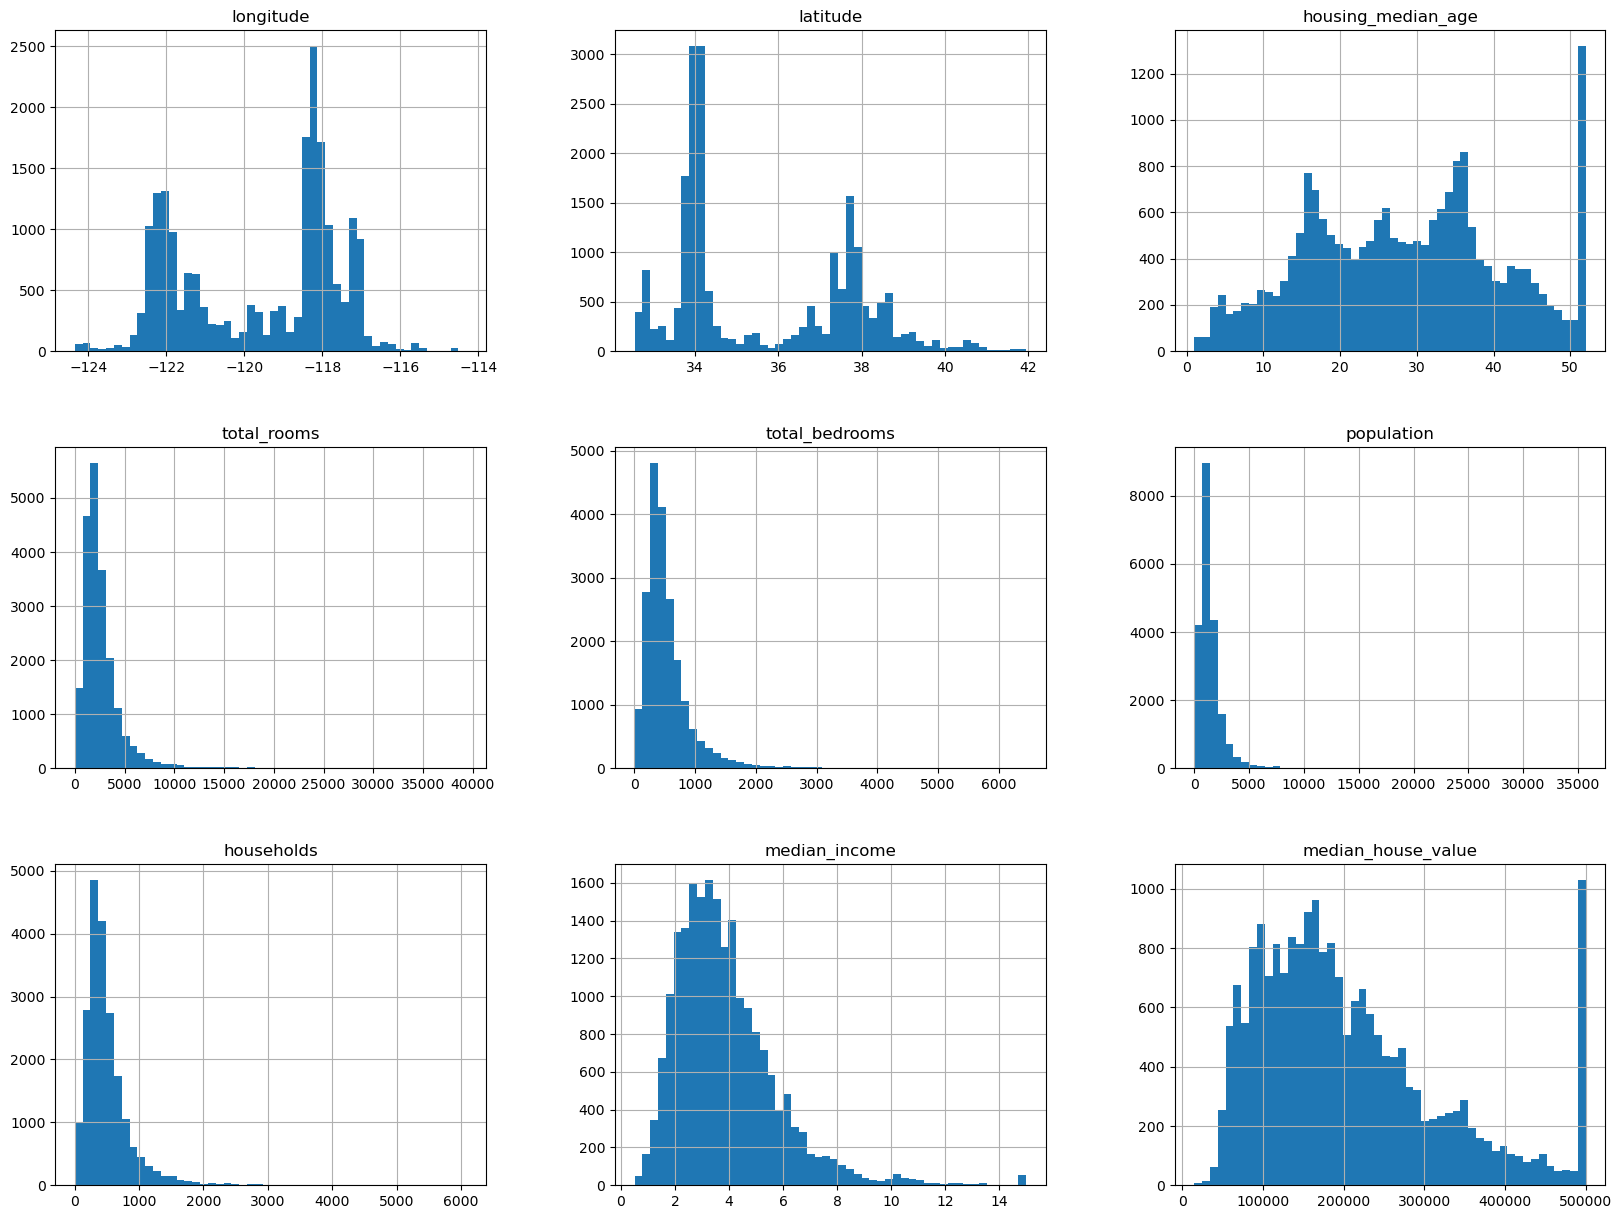

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

# Create a Test Set


In [12]:
import numpy as np

def split_train_test(data, test_ratio):
   shuffled_indices = np.random.permutation(len(data))
   test_set_size = int(len(data) * test_ratio)
   test_indices = shuffled_indices[:test_set_size]
   train_indices = shuffled_indices[test_set_size:]
   return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
# alternate splitting implementaion
from zlib import crc32

def test_set_check(identifiier, test_ratio):
   return crc32(np.int64(identifiier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
   ids = data[id_column]
   in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
   return data.loc[-in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index() # adds an 'index' column
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [17]:
# use sklearn to split dataset
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
len(train_set)

16512

In [19]:
housing["income_cat"]= pd.cut(housing["median_income"], bins=[0., 1.5, 3.0,4.5, 6., np.inf], labels=[1,2,3,4,5])

<Axes: >

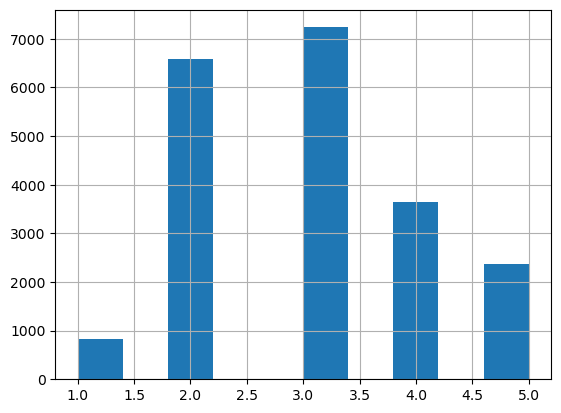

In [20]:
housing["income_cat"].hist()

In [21]:
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
   strat_train_set = housing.loc[train_index]
   strat_test_set = housing.loc[test_index]

In [22]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [23]:
# remove income_cat
for set_ in (strat_train_set, strat_test_set):
   set_.drop("income_cat", axis=1, inplace=True)

# Dicover and Visuallize the Data to Gain Insights


In [24]:
housing = strat_train_set.copy() # make a copy to play with

<Axes: xlabel='longitude', ylabel='latitude'>

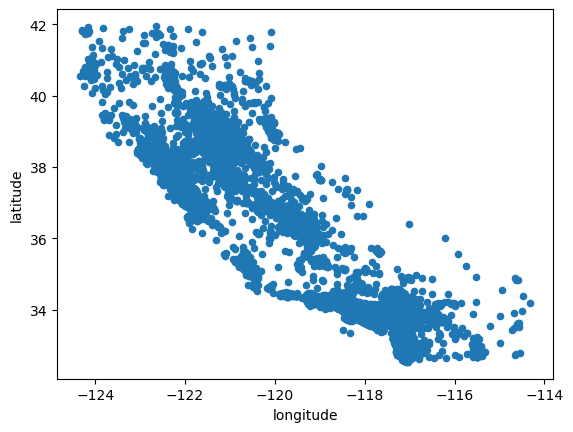

In [25]:
# create a scatter plot
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

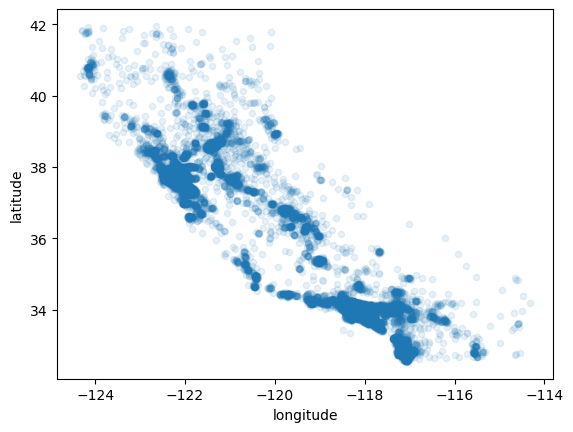

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

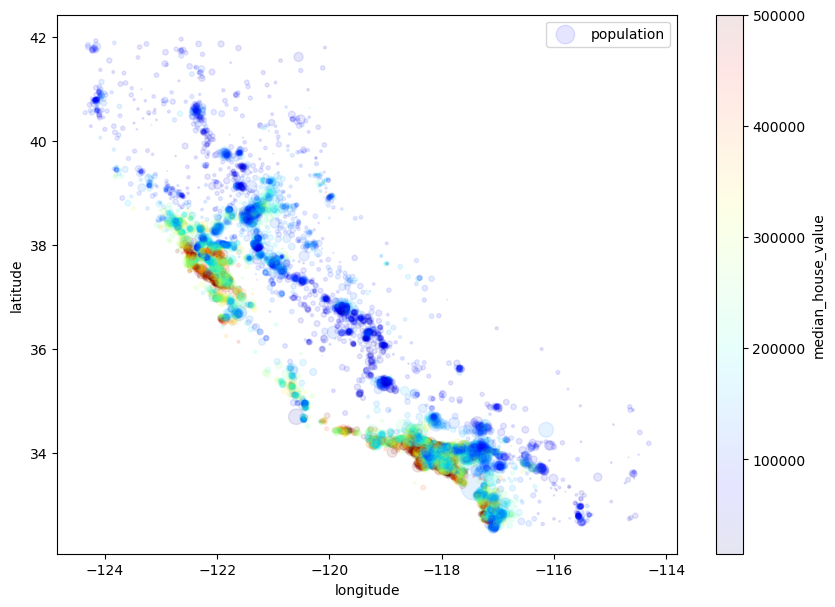

In [27]:
housing.plot(kind="scatter", x="longitude", y='latitude', alpha=0.1, s=housing["population"]/100, label="population", figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [28]:
# compute the standard correlation coefficient (Pearson's r)
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\KratosGado\AppData\Local\Temp\ipykernel_8236\1816755077.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

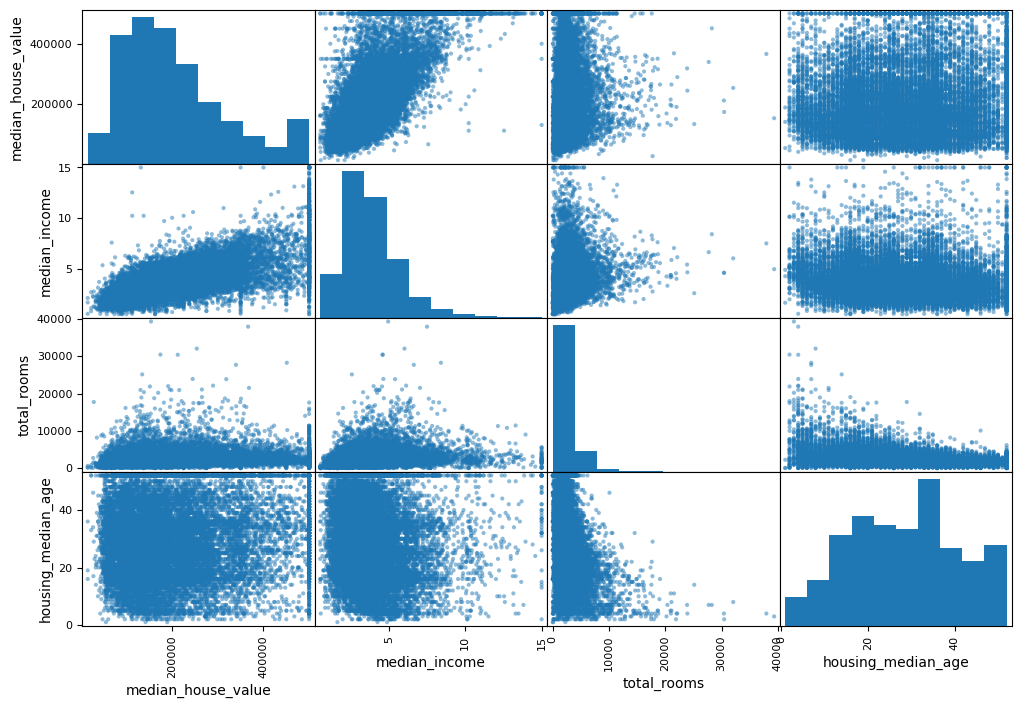

In [29]:
# pandas to analyze correlation
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

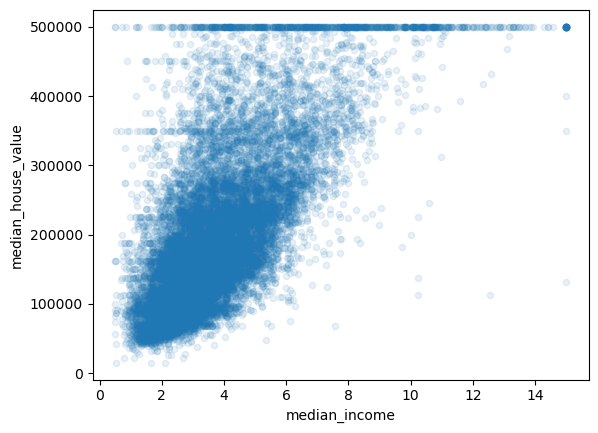

In [30]:
# zoom in on median income
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# Experimenting with Attribute Combinations


In [31]:
# create combinations
housing["rooms_per_houssehold"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing['total_rooms']
housing["population_per_household"] = housing['population']/housing['households']

In [32]:
# check the correlation matrix again
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\KratosGado\AppData\Local\Temp\ipykernel_8236\1588397265.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_houssehold        0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithms


In [33]:
# create a copy of the data
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning


In [34]:
# housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace= True)

In [35]:
# replacing missing values with sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# create a copy of the data without the text attribute ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [37]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
# use the trained imputer to transform the training set
X = imputer.transform(housing_num)

In [39]:
# put it back into a pandas Dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Handling Text and Categorical Attributes


In [40]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [41]:
# convert the categories from text to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
# One-Hot encoding categories
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
# converting it to dense numpy array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [47]:
# get list of categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix = bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
   def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
      self.add_bedrooms_per_room = add_bedrooms_per_room
   
   """fittine"""
   def fit(self, X, y=None):
      return self # Nothing else to do
   
   def transform(self, X, y=None):
      rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
      population_per_household = X[:, population_ix] / X[:, households_ix]
      if self.add_bedrooms_per_room:
         bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
         return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
      else:
         return np.
